In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import sklearn
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model, preprocessing

In [2]:
data = pd.read_csv("USCensusIncome.data", index_col = False, names = ["Age", "Work Class", "Final Weight", "Education", "Education Num", "Marital Status", 
                           "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss", "Hours per week", 
                           "Native Country", "Income"])
data.head()

,Age,Work Class,Final Weight,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data.shape

(32561, 15)

In [4]:
data.isnull().sum()

Age               0
Work Class        0
Final Weight      0
Education         0
Education Num     0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital Gain      0
Capital Loss      0
Hours per week    0
Native Country    0
Income            0
dtype: int64

In [5]:
#data.describe()

In [6]:
data.dtypes

Age                int64
Work Class        object
Final Weight       int64
Education         object
Education Num      int64
Marital Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital Gain       int64
Capital Loss       int64
Hours per week     int64
Native Country    object
Income            object
dtype: object

In [7]:
#list all columns that don't have numerical data and their unique values.
for i in range(0, len(data.columns)):
    if data.dtypes[i] != "int64":
        print(data.columns[i], ": ", data[data.columns[i]].unique(), "\n")

Work Class :  [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

Education :  [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

Marital Status :  [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 

Occupation :  [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv'] 

Relationship :  [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative'] 

Race :  [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other'] 

Sex :  [' Male' ' Female'] 

Native Country :  [' Unite

In [8]:
#Encode all non-numerical values.
encoded_cols = []
lab_enc = preprocessing.LabelEncoder()

for i in range (0, len(data.columns)):
    if data.dtypes[i] != "int64":
        encoded_cols.append("encoded_" + data.columns[i])
        encoded_cols[-1] = lab_enc.fit_transform(list(data[data.columns[i]]))
        
print(encoded_cols)

[array([7, 6, 4, ..., 4, 4, 5], dtype=int64), array([ 9,  9, 11, ..., 11, 11, 11], dtype=int64), array([4, 2, 0, ..., 6, 4, 2], dtype=int64), array([1, 4, 6, ..., 1, 1, 4], dtype=int64), array([1, 0, 1, ..., 4, 3, 5], dtype=int64), array([4, 4, 4, ..., 4, 4, 4], dtype=int64), array([1, 1, 1, ..., 0, 1, 0], dtype=int64), array([39, 39, 39, ..., 39, 39, 39], dtype=int64), array([0, 0, 0, ..., 0, 0, 1], dtype=int64)]


In [9]:
#transpose each columns and append to the train dataset (except the income data).
x_input = np.array(encoded_cols[:-1]).T

#for i in encoded_cols[:-1]:
    #x_input.append(list(zip(i)))

#income data as outcome
y_outcome = encoded_cols[-1]
x_input

array([[ 7,  9,  4, ...,  4,  1, 39],
       [ 6,  9,  2, ...,  4,  1, 39],
       [ 4, 11,  0, ...,  4,  1, 39],
       ...,
       [ 4, 11,  6, ...,  4,  0, 39],
       [ 4, 11,  4, ...,  4,  1, 39],
       [ 5, 11,  2, ...,  4,  0, 39]], dtype=int64)

In [10]:
#test data changes every time this line of code is executed.
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x_input, y_outcome, test_size = 0.1)

#k must be odd so that the equal-vote situation does not happen
#if k is too high, the model will look for the neighbors who are too far away from the data point.
x_test

array([[ 4, 11,  0, ...,  4,  0, 39],
       [ 4,  9,  2, ...,  4,  1, 39],
       [ 4, 11,  4, ...,  4,  1, 39],
       ...,
       [ 0,  9,  4, ...,  1,  0, 36],
       [ 6, 11,  2, ...,  4,  1, 39],
       [ 4, 11,  4, ...,  4,  1, 39]], dtype=int64)

In [15]:
#function to find the average accuracy score of the model with "k" neighbors executing "n_executions" times.
def knn_accuracy_ave(k, n_executions):
    accuracy_sum = 0
    for i in range(0, n_executions):
        x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x_input, y_outcome, test_size = 0.1)
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(x_train, y_train)
        accuracy_sum += knn.score(x_test, y_test)
    return accuracy_sum/n_executions

knn_accuracy_ave(19, 20)

0.819864906355542

In [20]:
#function to compare all diffent k values ranging from "k_min" to "k_max", each k is tested "n_executions" times.
#save the average accuracy score of each k-neighbors model to a list.
def knn_compare(k_min, k_max, n_executions):
    best_accuracy = 0
    best_k_value = 1
    outcome_list = []
    for i in range(k_min, k_max + 2, 2):
        accuracy_ave = knn_accuracy_ave(i, n_executions)
        outcome_list.append(accuracy_ave)
        print("k = ", i, ", AAS = ", accuracy_ave, end = "")
        if(accuracy_ave > best_accuracy):
            best_accuracy = accuracy_ave
            best_k_value = i
            print(", Best average score updated.")
        else:
            print(".")
    print("The best score is {}, recorded when k = {}".format(best_accuracy, best_k_value))
    return list(range(k_min, k_max + 2, 2)), outcome_list
    
(x_plot, y_plot) = knn_compare(1, 99, 10)
(x_plot, y_plot)

k =  1 , AAS =  0.7623579981578139, Best average score updated.
k =  3 , AAS =  0.798342032545287, Best average score updated.
k =  5 , AAS =  0.8096100706171322, Best average score updated.
k =  7 , AAS =  0.8128031931225055, Best average score updated.
k =  9 , AAS =  0.8165489714461159, Best average score updated.
k =  11 , AAS =  0.8184218606079213, Best average score updated.
k =  13 , AAS =  0.8174393613754989.
k =  15 , AAS =  0.8218606079214, Best average score updated.
k =  17 , AAS =  0.8208781086889776.
k =  19 , AAS =  0.8201105311636475.
k =  21 , AAS =  0.8186674854160272.
k =  23 , AAS =  0.8225667792447038, Best average score updated.
k =  25 , AAS =  0.817470064476512.
k =  27 , AAS =  0.8230580288609151, Best average score updated.
k =  29 , AAS =  0.82109303039607.
k =  31 , AAS =  0.8211544365980963.
k =  33 , AAS =  0.8216149831132944.
k =  35 , AAS =  0.8217377955173474.
k =  37 , AAS =  0.8201412342646608.
k =  39 , AAS =  0.8181762357998158.
k =  41 , AAS =  0.8

([1,
  3,
  5,
  7,
  9,
  11,
  13,
  15,
  17,
  19,
  21,
  23,
  25,
  27,
  29,
  31,
  33,
  35,
  37,
  39,
  41,
  43,
  45,
  47,
  49,
  51,
  53,
  55,
  57,
  59,
  61,
  63,
  65,
  67,
  69,
  71,
  73,
  75,
  77,
  79,
  81,
  83,
  85,
  87,
  89,
  91,
  93,
  95,
  97,
  99],
 [0.7623579981578139,
  0.798342032545287,
  0.8096100706171322,
  0.8128031931225055,
  0.8165489714461159,
  0.8184218606079213,
  0.8174393613754989,
  0.8218606079214,
  0.8208781086889776,
  0.8201105311636475,
  0.8186674854160272,
  0.8225667792447038,
  0.817470064476512,
  0.8230580288609151,
  0.82109303039607,
  0.8211544365980963,
  0.8216149831132944,
  0.8217377955173474,
  0.8201412342646608,
  0.8181762357998158,
  0.818513969910961,
  0.8179920171937367,
  0.8203254528707399,
  0.8206938900828982,
  0.8233957629720603,
  0.8241326373963769,
  0.8201412342646608,
  0.8195271722443966,
  0.8225360761436905,
  0.817285845870433,
  0.8227817009517961,
  0.8221676389315322,
  0.82029

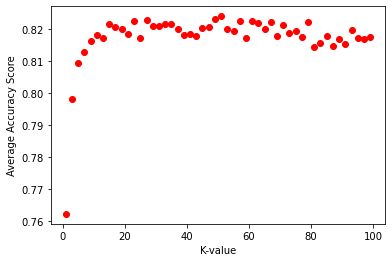

In [21]:
#plot all the average scores
plt.scatter(x_plot, y_plot, c = 'r')
plt.xlabel("K-value")
plt.ylabel("Average Accuracy Score")
plt.show()

In [22]:
#Test a k-neighbors model
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x_input, y_outcome, test_size = 0.1)
knn = KNeighborsClassifier(n_neighbors = 41)
knn.fit(x_train, y_train)
print(knn.score(x_test, y_test))
y_predict = knn.predict(x_test)
for i in range(len(y_predict)):
    print("Predicted value: ", y_predict[i], "Actual value: ", y_test[i], "Data: ", x_test[i])

0.829597789376727
Predicted value:  1 Actual value:  1 Data:  [ 4 12  2 10  0  4  1 39]
Predicted value:  0 Actual value:  0 Data:  [ 7 15  3  1  4  1  0 30]
Predicted value:  0 Actual value:  0 Data:  [ 4 11  2  3  0  4  1 39]
Predicted value:  0 Actual value:  0 Data:  [ 6 15  2  3  0  4  1 39]
Predicted value:  0 Actual value:  0 Data:  [ 0 11  2  0  0  2  1 39]
Predicted value:  0 Actual value:  0 Data:  [ 6 11  2  3  0  4  1 39]
Predicted value:  0 Actual value:  0 Data:  [ 4  7  5  1  4  4  1 39]
Predicted value:  0 Actual value:  0 Data:  [ 4  1  4 12  3  4  0 39]
Predicted value:  0 Actual value:  0 Data:  [ 5 11  2  3  0  4  1 39]
Predicted value:  0 Actual value:  0 Data:  [ 4 15  0  1  1  4  0 39]
Predicted value:  0 Actual value:  0 Data:  [ 4 11  0  7  4  4  0 39]
Predicted value:  1 Actual value:  1 Data:  [ 6 14  2 10  0  4  1 39]
Predicted value:  0 Actual value:  0 Data:  [ 4 11  4  7  3  2  0 39]
Predicted value:  0 Actual value:  0 Data:  [ 4 11  0 14  1  4  1 39]
Pr

Predicted value:  0 Actual value:  0 Data:  [ 4 15  4 12  3  4  0 39]
Predicted value:  0 Actual value:  0 Data:  [ 4 11  4  6  3  2  1 39]
Predicted value:  0 Actual value:  0 Data:  [ 4 11  4  3  3  2  0 39]
Predicted value:  0 Actual value:  0 Data:  [ 4  4  2  3  2  4  0 39]
Predicted value:  1 Actual value:  0 Data:  [ 4 15  2 10  0  4  1 39]
Predicted value:  0 Actual value:  0 Data:  [ 4  8  2  3  0  4  1 39]
Predicted value:  0 Actual value:  0 Data:  [ 4  8  2  6  0  4  1 39]
Predicted value:  0 Actual value:  0 Data:  [ 2 11  2  3  0  4  1 39]
Predicted value:  0 Actual value:  0 Data:  [ 4  9  4  8  1  4  1 39]
Predicted value:  0 Actual value:  0 Data:  [ 0 15  6  0  1  2  0 39]
Predicted value:  0 Actual value:  1 Data:  [ 7 10  0 10  1  4  0 39]
Predicted value:  0 Actual value:  0 Data:  [ 2 11  0  1  1  4  0 39]
Predicted value:  0 Actual value:  0 Data:  [ 6 15  2  3  0  4  1 31]
Predicted value:  0 Actual value:  0 Data:  [ 4  2  4  8  3  4  0 39]
Predicted value:  0 

Predicted value:  0 Actual value:  0 Data:  [ 4 15  4  1  1  2  0 39]
Predicted value:  0 Actual value:  0 Data:  [ 2 15  2  3  0  4  1 39]
Predicted value:  0 Actual value:  1 Data:  [ 6 15  2 13  0  4  1 39]
Predicted value:  0 Actual value:  0 Data:  [ 4 11  2 14  0  4  1 39]
Predicted value:  0 Actual value:  0 Data:  [ 4 11  2  3  0  3  1 26]
Predicted value:  0 Actual value:  0 Data:  [ 4  9  0 10  4  4  0 39]
Predicted value:  0 Actual value:  0 Data:  [ 6 11  4 12  4  4  1 39]
Predicted value:  0 Actual value:  0 Data:  [ 4 15  6  7  4  4  0 39]
Predicted value:  0 Actual value:  0 Data:  [ 4 11  2  3  0  4  1 39]
Predicted value:  0 Actual value:  1 Data:  [ 6 15  2 13  0  4  1 39]
Predicted value:  0 Actual value:  0 Data:  [ 4 15  4  3  1  4  1 39]
Predicted value:  0 Actual value:  0 Data:  [ 2  5  2  1  0  4  1 39]
Predicted value:  0 Actual value:  0 Data:  [4 2 4 8 4 2 0 0]
Predicted value:  0 Actual value:  0 Data:  [ 4  2  4  1  3  4  0 39]
Predicted value:  0 Actual v

Predicted value:  0 Actual value:  0 Data:  [ 4 12  0 10  4  4  0 39]
Predicted value:  0 Actual value:  0 Data:  [ 4 11  4  1  1  4  0 39]
Predicted value:  0 Actual value:  0 Data:  [ 4 11  2 12  0  4  1 39]
Predicted value:  1 Actual value:  1 Data:  [ 4 12  2  4  0  4  1 39]
Predicted value:  1 Actual value:  0 Data:  [ 4  9  2 12  0  4  1 23]
Predicted value:  1 Actual value:  1 Data:  [ 4 12  2 12  0  4  1 39]
Predicted value:  0 Actual value:  0 Data:  [ 6 15  2 12  0  4  1 39]
Predicted value:  0 Actual value:  0 Data:  [ 4  9  4 10  1  4  1 39]
Predicted value:  0 Actual value:  1 Data:  [ 4 11  2  7  0  4  1 39]
Predicted value:  0 Actual value:  0 Data:  [ 4 11  3  1  4  2  0 39]
Predicted value:  1 Actual value:  0 Data:  [ 4 15  2  4  0  4  1 39]
Predicted value:  0 Actual value:  0 Data:  [ 4 12  0  4  1  4  0 39]
Predicted value:  0 Actual value:  0 Data:  [ 4 11  6 12  1  4  0 39]
Predicted value:  0 Actual value:  0 Data:  [ 4  8  4  1  1  4  0 39]
Predicted value:  0 

Predicted value:  0 Actual value:  0 Data:  [ 4 11  2  3  0  4  1 39]
Predicted value:  0 Actual value:  0 Data:  [ 4  9  4 12  1  4  1 39]
Predicted value:  1 Actual value:  1 Data:  [ 2  9  2 12  0  1  1 30]
Predicted value:  0 Actual value:  0 Data:  [ 4 11  4 13  1  4  0 39]
Predicted value:  0 Actual value:  0 Data:  [ 0 11  4  0  1  4  0 39]
Predicted value:  0 Actual value:  0 Data:  [ 4 15  5 10  3  4  0 39]
Predicted value:  1 Actual value:  1 Data:  [ 5 12  2 10  0  4  1 39]
Predicted value:  0 Actual value:  0 Data:  [ 4 11  0  7  1  2  1 39]
Predicted value:  0 Actual value:  0 Data:  [ 4 13  4  8  1  1  0 25]
Predicted value:  0 Actual value:  0 Data:  [ 4  9  4  4  1  4  0 39]
Predicted value:  0 Actual value:  0 Data:  [ 4 11  2  3  0  4  1 39]
Predicted value:  0 Actual value:  0 Data:  [ 4  9  4 10  3  4  1 39]
Predicted value:  0 Actual value:  1 Data:  [ 5 11  2  3  0  4  1 39]
Predicted value:  0 Actual value:  0 Data:  [ 4 11  0  1  4  4  0 39]
Predicted value:  0 